# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [204]:
df = pd.read_csv("diabetes.csv")

Step 2 - a) Write code to display dataset info b) Print 10 rows from dataset.

In [205]:
# display dataset info
df.info()

# print 10 rows from dataset
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


In [206]:
# print last 10 rows of dataset
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.500,0.197,26,0
759,6,190,92,0,0,35.500,0.278,66,1
760,2,88,58,26,16,28.400,0.766,22,0
761,9,170,74,31,0,44.000,0.403,43,1
762,9,89,62,0,0,22.500,0.142,33,0
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1
767,1,93,70,31,0,30.400,0.315,23,0


Step 3 - Write code to remove Pregnancy column 

In [207]:
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [208]:
df.drop(['Pregnancies'], axis=1, inplace=True)

Step 4 - Write code to display info of dataset and check shape of dataset.

In [209]:
# diplay info of dataset
df.info()

# check shape of dataset
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
(768, 8)


Step 5 - Write code to clean data

In [210]:
# locate zeros in colums
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# fill zeros in column with NaN value
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# now fill NaN values in each column with the median value of the column
df[cols_with_zeros] = df[cols_with_zeros].fillna(df[cols_with_zeros].median()) # used median to get slightly better results 

# check
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [211]:
# create a series for the Outcome column
target = df['Outcome']

# create a separate dataframe dataframe by removing the Outcome column
inputs = df.drop('Outcome', axis=1)

display(target.head())
display(inputs.head())

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.000,72.000,35.000,125.000,33.600,0.627,50
1,85.000,66.000,29.000,125.000,26.600,0.351,31
2,183.000,64.000,29.000,125.000,23.300,0.672,32
3,89.000,66.000,23.000,94.000,28.100,0.167,21
4,137.000,40.000,35.000,168.000,43.100,2.288,33


Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [212]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

# print 
print(len(X_train), len(X_test), len(inputs))

# calculating training and testing data percentage.
print(len(X_train) / len(inputs)) # training data %
print(len(X_test) / len(inputs)) # testing data %

614 154 768
0.7994791666666666
0.20052083333333334


#### **Step #7: Initialize your model**




In [213]:
model = GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [214]:
# fit model
model.fit(X_train, y_train)

# find score
display(model.score(X_test, y_test))

# test on testing data
pred = np.array(model.predict(X_test))

0.7597402597402597

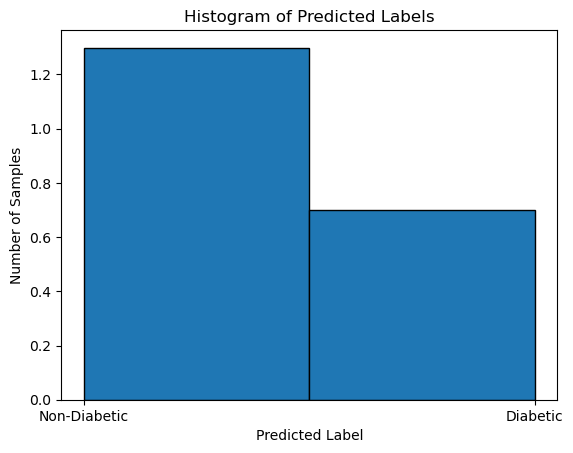

In [215]:
# create visualization using histogram
plt.hist(pred, bins=2, density=True, edgecolor='black') #density=True scales the histogram down to fractions for easier comparision
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('Number of Samples')
plt.title('Histogram of Predicted Labels')
plt.show()

Step 9 - Predict using model on test data

In [216]:
pred_probability = np.array(model.predict_proba(X_test)) 

print(pred[:10])
for i in range(1, 11):
    print(pred_probability[i][0], end=", ")

[0 0 0 0 1 0 0 0 1 1]
0.8953529361819872, 0.9640139467198019, 0.8857619127414429, 0.47049741401504563, 0.5165762118337436, 0.9985496380296406, 0.5535134050308383, 0.4846637881266934, 0.17621450764629346, 0.9178141334031861, 

Step 10 -  Find accuracy of model

In [217]:
# Import necessary library and built in functions
import matplotlib.pyplot as plt
from sklearn import metrics

# Evaluate model's Accuracy
accuracy = metrics.accuracy_score(y_test, pred)
accuracy_percent =round(accuracy * 100,2)

# Evaluate model's Precision 
precision = metrics.precision_score(y_test, pred)
precision_percent = round(precision * 100,2)

# Evaluate models's Sensitivity (Recall)
sensitivity_recall = metrics.recall_score(y_test, pred)
s_r_percent = round(sensitivity_recall * 100,2)

# Evaluate model's F1-score
f1_score = metrics.f1_score(y_test, pred)
f1_score_percent = round(f1_score * 100,2)

# Print metrics
print("Model's Evaluation Metrics:")
print("Accuracy:",accuracy_percent,"%")
print("Precision:",precision_percent,"%")
print("Sensitivity(Recall):",s_r_percent,"%")
print("F1 Score:",f1_score_percent,"%")

Model's Evaluation Metrics:
Accuracy: 75.97 %
Precision: 66.67 %
Sensitivity(Recall): 65.45 %
F1 Score: 66.06 %


Step 11 - Confusion Matrix

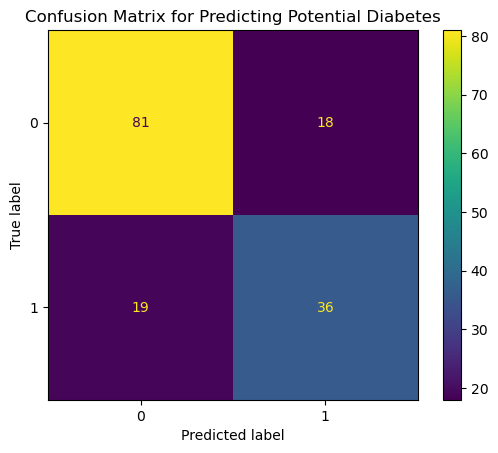

In [218]:
# Plot confusion matrix to see where model makes mistakes
confusion_matrix = metrics.confusion_matrix(y_test, pred)

# Necessary for Specificity score
tn, fp, fn, tp = confusion_matrix.ravel()

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay\
            (confusion_matrix = confusion_matrix, display_labels = [0,1])

cm_display.plot()
plt.title("Confusion Matrix for Predicting Potential Diabetes")
plt.show()

In [219]:
# Evaluate model's Specificity
specificity = tn / (tn + fp)
specificity_percent = round(specificity * 100,2)

print("Specificity:",specificity_percent,"%")

Specificity: 81.82 %
